<a href="https://colab.research.google.com/github/SofiaQuiroga/Repositorio_Taller4_BDML/blob/main/Scripts/Taller4_Red_Neuronal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style type="text/css">

.responsive {
 width: 100%;
 height: 25%;
}

.list-group-item.active, .list-group-item.active:focus, .list-group-item.active:hover {
    z-index: 2;
    color: #fff;
    background-color: #1B175E;
    border-color: #337ab7;
}
h1, h2, h3, h4 {
    color: #000002;
    background-color: #1B175E;
    background-image:
      linear-gradient(to right,
       #fff, #ffff00
     );

}

h1, h2, h3, h4, p {
    color: #000002;
}

a {
    color: #1B175E;
}
</style>


In [1]:
rm(list = ls())


In [2]:
install.packages('keras')
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




# Modelo
Vamos a crear una red neuronal que solo tenga una hidden layer. Vamos a usar la siguiente regla del pulgar para escoger el número de neuronas:
$$N_h=\frac{N_s}{\alpha\cdot(N_i+N_o)}$$
En donde:
- $N_i:$ Es el número de las neuronas inputs (número de columnas).
- $N_o:$ Número de neuronas en la capa de salida (número de categorías posibles).
- $N_s:$ Número de observaciones.
- $\alpha:$ Factor arbitrario entre 2 y 10.

Se pueden crear n capas ocultas 

Tenemos la regla del pulgar que dice el estimado de más o menos cuantos nodos se deberían usar en una capa oculta.


In [9]:
# Importamos data, data_clean, tf_idf, tf_idf_reducido
# https://github.com/ignaciomsarmiento/datasets/raw/main/datos_para_modelar.RData
load("train_clean.RData")

In [10]:
sum(is.na(train_clean$name)) # data clean, mirar si tenemos datos faltantes

[1] 0

In [11]:
table(train_clean$name)


   1    2    3 
3468 2873 3000 

In [12]:
library(dplyr)

In [13]:
head(train_clean)

id,name,texto
<chr>,<fct>,<chr>
0002fd5a5cc196257335c0d7,1,manana feria santamario show arbol abundancia ir invito ir disfrutar familiar amigo evento preparado amor podar celebrar junto navidad
00049c5a2f555cfd13544693,3,amenazar asesinar asesinar columnista emerson grajal
0005c20695e7b3a5babff571,1,policia concentrarse seguridad ciudadana prevencion delito captura delincuente desarticulacion banda criminal bogota necesitar policia distraer tema margen prioridad
0005f46356c00cc4f5702f01,1,iniciar mesa tecnico presidente ratifico gobierno pondria recurso adicional caso importante aclarar aclarar ra linea construccion contrato vigente colombiano obra ejecucion seguira
000ba279c4a0ff679d8d3fdc,3,elevado costo energiar europar
0014838239be8f5311356c37,3,quema vehiculo extender suroeste antioquia


In [14]:
Y_train <- train_clean$name
Y_train <- to_categorical(Y_train) # convertir en variable categorica

In [15]:
head(Y_train)

0,1,0,0
0,0,0,1
0,1,0,0
0,1,0,0
0,0,0,1
0,0,0,1


In [16]:
head(Y_train,10)
dim(Y_train)
class(Y_train)

0,1,0,0
0,0,0,1
0,1,0,0
0,1,0,0
0,0,0,1
0,0,0,1
0,1,0,0
0,1,0,0
0,0,1,0
0,0,0,1


[1] 9341    4

[1] "matrix" "array"

In [17]:
load("tf_idf_train.RData")

In [18]:
X <- as.matrix(tf_idf_train) # matriz de frecuencias
class(X)

[1] "matrix" "array"

In [19]:
dim(X) 

[1]  9341 17020

In [22]:
columnas <- colSums(tf_idf_train) %>%
  data.frame() %>%
  arrange(desc(.)) %>%
  head(1000) %>% # Dejar las 1000 columnas de palabras más importantes
  rownames()

In [23]:
tf_idf_train_reducido <- tf_idf_train %>% 
  select(all_of(columnas))

In [26]:
X_train <- as.matrix(tf_idf_train_reducido)
dim(X_train)

[1] 9341 1000

In [27]:
set.seed(3312)

n_h = nrow(train_clean)/(3*(ncol(train_clean) + 3)) # formula anterior de la regla del pulgar
n_h

[1] 518.9444

In [31]:
##Crear modelo. Dar en orden las capas de quiero
model1 <- keras_model_sequential() 

model1 %>% 
  layer_dense(units = 500, activation = 'relu', input_shape = ncol(X_train)) %>% # capa de entrada, con función de activación 
  layer_dense(units = 350, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 10, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>% # capa interna, aleatoraimente elimina algunas de los nodos en cada corrida para evitar overfitting. rate es el % de nodos que quiero se eliminen en cada corrida
  layer_dense(units = 4, activation = 'softmax') # capa de salida
summary(model1)

  # units corresponde al valor de cateogrias que se quiere clasificar

# Arquitectura del modelo
model1 %>% compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy', # minimizar funcion de perdida
  metrics = c('CategoricalAccuracy') 
)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_7 (Dense)                    (None, 500)                     500500      
 dense_6 (Dense)                    (None, 350)                     175350      
 dropout_2 (Dropout)                (None, 350)                     0           
 dense_5 (Dense)                    (None, 10)                      3510        
 dropout_1 (Dropout)                (None, 10)                      0           
 dense_4 (Dense)                    (None, 4)                       44          
Total params: 679,404
Trainable params: 679,404
Non-trainable params: 0
________________________________________________________________________________


In [32]:
history <- model1 %>% 
  fit(
    X_train, Y_train, # entrenar el modelo
    epochs = 300, # aprende 2 veces dentro de los baches de epoca
    batch_size = 2^10, #tamaño de datos que quiero que aprende dentro del tamaño del bache
    validation_split = 0.2 # set datos de entrenamiento para validar los parámetros
  )

#guarda lo que pasa en cada momento del tiempo

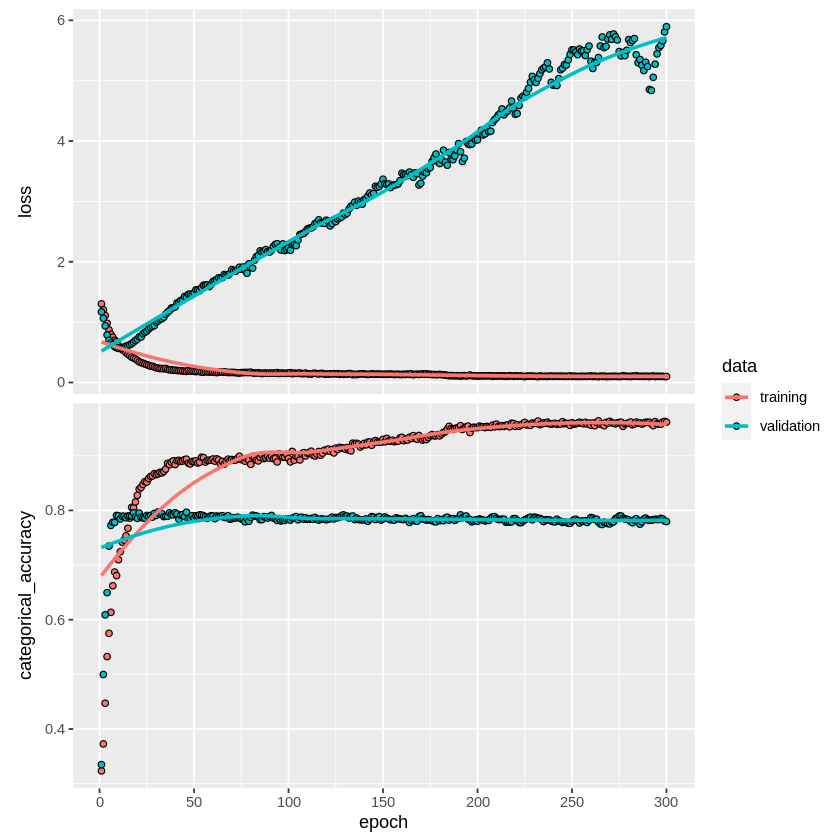

In [33]:
plot(history)

In [34]:
load("tf_idf_test.RData")

In [35]:
columnas <- colSums(tf_idf_test) %>%
  data.frame() %>%
  arrange(desc(.)) %>%
  head(1000) %>% # Dejar las 1000 columnas de palabras más importantes
  rownames()

In [36]:
tf_idf_test_reducido <- tf_idf_test %>% 
  select(all_of(columnas))

In [37]:
X_test <- as.matrix(tf_idf_test_reducido)
dim(X_test)

[1] 1499 1000

In [38]:
y_hat <- model1 %>% predict(X_test) %>% k_argmax()
head(y_hat)

tf.Tensor([3 3 1 3 3 3], shape=(6), dtype=int64)

In [39]:
prediccion <- factor(as.numeric(y_hat), levels = 1:3)
head(prediccion,10)

[1] 3 3 1 3 3 3 1 3 1 1
Levels: 1 2 3

In [40]:
load("test_clean.RData")

In [41]:
resultado <- data.frame(test_clean$id, prediccion)
head(resultado)

,test_clean.id,prediccion
,<chr>,<fct>
1,0004d31c290018d960ea1b61,3
2,001387a7e556a17e9af9e684,3
3,0017570ee84b80e1c3e10218,1
4,0036f3d867393f8effa12b66,3
5,004508bf8e624f9656fdf9ec,3
6,0052da408e75b7813dbcc512,3


In [42]:
names(resultado)[1] <- "id"
names(resultado)[2] <- "name"
head(resultado)

,id,name
,<chr>,<fct>
1,0004d31c290018d960ea1b61,3
2,001387a7e556a17e9af9e684,3
3,0017570ee84b80e1c3e10218,1
4,0036f3d867393f8effa12b66,3
5,004508bf8e624f9656fdf9ec,3
6,0052da408e75b7813dbcc512,3


In [43]:
resultado$name <- factor(resultado$name, levels = c("1", "2", "3"), labels = c("Lopez", "Petro", "Uribe"))
head(resultado,10)

,id,name
,<chr>,<fct>
1,0004d31c290018d960ea1b61,Uribe
2,001387a7e556a17e9af9e684,Uribe
3,0017570ee84b80e1c3e10218,Lopez
4,0036f3d867393f8effa12b66,Uribe
5,004508bf8e624f9656fdf9ec,Uribe
6,0052da408e75b7813dbcc512,Uribe
7,007bdeb03c21d2f9d469ddad,Lopez
8,0082edc86dfa7e2d6e95bd4d,Uribe
9,0087a99cd90e95c19e3b037b,Lopez


In [44]:
# Neurona faltante
test <- read.csv("test.csv")
tweet_faltante <- setdiff(test$id, resultado$id)
tweet_faltante

[1] "cb9ac947c675464803342fc9"

In [45]:
y_hat_faltante <- data.frame(id = "cb9ac947c675464803342fc9", name = "Lopez")
resultado <- rbind(resultado, y_hat_faltante)

In [46]:
write.csv(resultado, 'Red_Neuronal.csv',row.names=FALSE)